#### Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
#### Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
#### Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
#### Output Format:
#### genre_1 percent_1
#### genre_2 percent_2
#### . . .

{'Comedy', 'Thriller', 'Family', 'Sport', 'Romance', 'Drama', 'Horror', 'Sci-Fi', 'Action', 'Musical', 'Crime', 'Music', 'Adventure', 'Mystery', 'Fantasy', 'Western', 'History', 'War', 'Biography', 'Animation'}
['Comedy', 'Thriller', 'Family', 'Sport', 'Romance', 'Drama', 'Horror', 'Sci-Fi', 'Action', 'Musical', 'Crime', 'Music', 'Adventure', 'Mystery', 'Fantasy', 'Western', 'History', 'War', 'Biography', 'Animation']
[1740100000, 961500000, 460000000, 110000000, 270900000, 2614400000, 6600000, 2596000000, 4332500000, 61000000, 426500000, 37300000, 6046700000, 469000000, 1094000000, 138000000, 173000000, 87000000, 624500000, 1845200000]


c:\users\shivam shekhar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


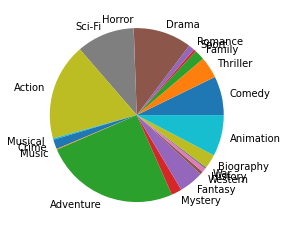

Comedy 7.22
Thriller 3.99
Family 1.91
Sport 0.46
Romance 1.12
Drama 10.85
Horror 0.03
Sci-Fi 10.77
Action 17.98
Musical 0.25
Crime 1.77
Music 0.15
Adventure 25.10
Mystery 1.95
Fantasy 4.54
Western 0.57
History 0.72
War 0.36
Biography 2.59
Animation 7.66


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sqlite3

db = sqlite3.connect('IMDB.sqlite') 
cur = db.cursor()

data = pd.read_sql_query('select * from genre inner join IMDB on IMDB.Movie_id = genre.Movie_id ',db)
data.drop(data.loc[data.genre == ''].index,inplace=True)
gen = set(data['genre'])
print(gen)
data['Budget'].replace('','0',inplace=True) 
def getBud(bud):
    if bud == "":
        return 0
    return bud
    

data['Budget']=data['Budget'].apply(getBud) 
np_bud = np.array(data['Budget'])

total = sum(np_bud)

gen_list = [] 
perc = [] 
    
for el in gen:
    
    gen_list.append(el)
    d = data[data['genre'] == el]
    p_list = np.array(d['Budget'])
    perc.append(int(sum(p_list)))
    
print(gen_list) 
print(perc)
plt.pie(perc , labels=gen_list  )    
plt.show()
for i in range(len(perc)):
    perc[i] = (perc[i]/total)*100
    #perc[i] = round(perc[i])
    perc[i] = '%.2f'%perc[i]
    #print(perc[i])

for i in range(len(perc)):
    
    print(gen_list[i] , perc[i])

#### METHOD 2 

i have joined all 3 tables
to get dataframe
line 56 57 is dropping empty spaces
getting upto this ?


yea


now on line 59
i created variable
which calculates total sum
of budget
as we need to calculate percentage
so each budget will be divided by total
right ?


got it


now on line 60
i am grouping on the basis of genre
what it will do
lets say
genre is 
Fantasy 
so it will group all budget values of fantasy
and similar to other genre
ok ?


cool


then i am getting sum of budget for each genre
and then sorting
in descending for
form
and in for loop i am dividing each genre budget by total sum
and *100
to get percentage value
and formatting upto 2 decimal

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query('select * from IMDB',db)
earning = pd.read_sql_query('select * from earning',db)
genre = pd.read_sql_query('select * from genre',db)

df = pd.read_sql_query('select genre.genre, genre.movie_id, earning.Domestic, earning.Worldwide,imdb.Budget from genre join earning on genre.Movie_id = earning.Movie_id join imdb on imdb.Movie_id = earning.Movie_id',db)
df.drop(df.loc[df.Budget == ''].index,inplace=True)
df.drop(df.loc[df.genre == ''].index,inplace=True)
# df['Total'] = (df.Domestic+df.Worldwide)
budget = df.Budget.sum()
l = df.groupby('genre')['Budget'].sum().sort_values(ascending=False)
gen = l.index
for i in range(len(l)):
    print(gen[i],format(l[i]*100/budget,'.2f'))

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03
